<a href="https://colab.research.google.com/github/Rajesh6097/Performing_Analysis_of_Meteorological_Data/blob/main/Performing_Analysis_of_Meteorological_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn as sk

In [3]:
df=pd.read_csv('/content/weatherHistory.csv')

In [4]:
np.random.seed(0)


In [5]:
# get the number of missing data points per column
missing_values_count =df.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  1
dtype: int64

In [6]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.0005084918132818062


In [7]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49165 entries, 0 to 49164
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            49165 non-null  object 
 1   Summary                   49165 non-null  object 
 2   Precip Type               49165 non-null  object 
 3   Temperature (C)           49165 non-null  float64
 4   Apparent Temperature (C)  49165 non-null  float64
 5   Humidity                  49165 non-null  float64
 6   Wind Speed (km/h)         49165 non-null  float64
 7   Wind Bearing (degrees)    49165 non-null  float64
 8   Visibility (km)           49165 non-null  float64
 9   Loud Cover                49164 non-null  float64
 10  Pressure (millibars)      49164 non-null  float64
 11  Daily Summary             49164 non-null  object 
dtypes: float64(8), object(4)
memory usage: 4.5+ MB


In [9]:
titles_req=['Formatted Date','Apparent Temperature (C)','Humidity','Summary']
df_1=df[titles_req]

In [10]:
df_1.rename({'Apparent Temperature (C)': 'Apparent Temperature'}, axis=1, inplace=True)

In [11]:
df_1['Formatted Date']=pd.to_datetime(df_1['Formatted Date'],utc=True)
df_2= df_1.set_index('Formatted Date')
df_2.resample('M').mean()

,Apparent Temperature,Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,-4.050000,0.890000
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2006-03-31 00:00:00+00:00,1.969780,0.778737
2006-04-30 00:00:00+00:00,12.098827,0.728625
...,...,...
2011-08-31 00:00:00+00:00,22.897656,0.630889
2011-09-30 00:00:00+00:00,NaN,NaN
2011-10-31 00:00:00+00:00,NaN,NaN


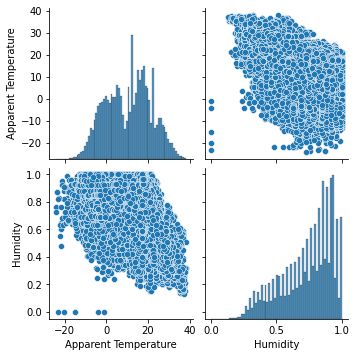

In [12]:
sns.pairplot(df_2,kind='scatter')
plt.show()

<Figure size 1440x1440 with 0 Axes>

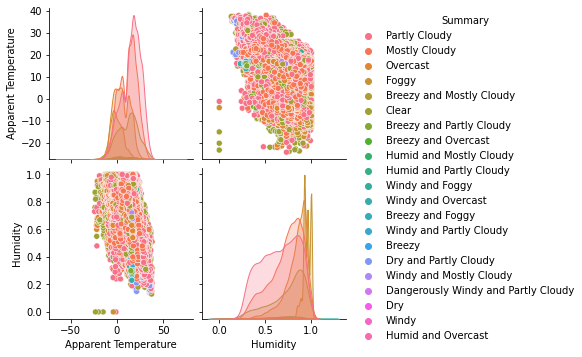

In [13]:
plt.figure(figsize=(20,20))
sns.pairplot(df_2, hue="Summary") 
plt.show()

<Figure size 1152x432 with 0 Axes>

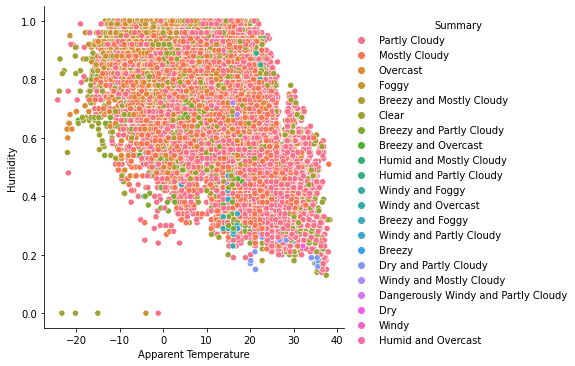

In [14]:
plt.figure(figsize=(16,6))
sns.relplot( x ='Apparent Temperature',y='Humidity',color='purple',hue="Summary" , data=df_2)

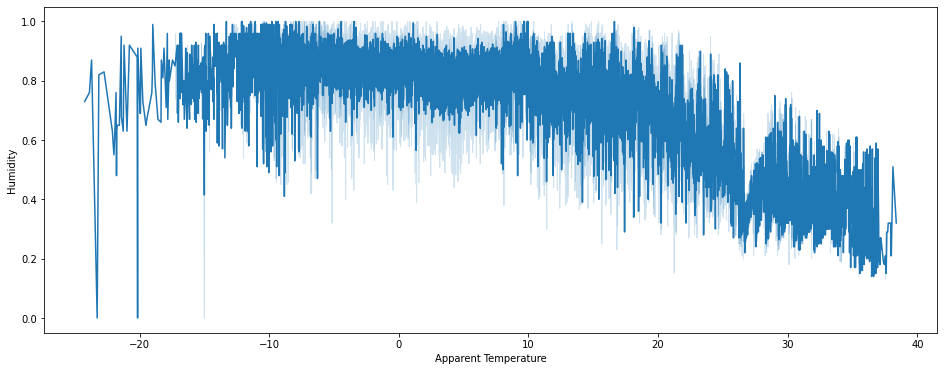

In [15]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))

# Line chart showing  
sns.lineplot(x ='Apparent Temperature',y='Humidity', data=df_2)

In [16]:
df_may=df_2[df_2.index.month==5]
df_may.head()

,Apparent Temperature,Humidity,Summary
Formatted Date,,,
2006-05-31 22:00:00+00:00,6.133333,0.86,Partly Cloudy
2006-05-31 23:00:00+00:00,7.294444,0.86,Partly Cloudy
2006-05-01 00:00:00+00:00,11.133333,0.91,Overcast
2006-05-01 01:00:00+00:00,11.600000,0.62,Mostly Cloudy
2006-05-01 02:00:00+00:00,11.088889,0.71,Mostly Cloudy


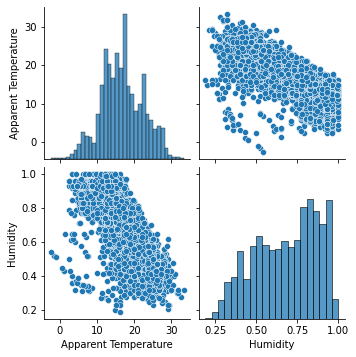

In [17]:
sns.pairplot(df_may,kind='scatter')
plt.show()

<Figure size 1152x432 with 0 Axes>

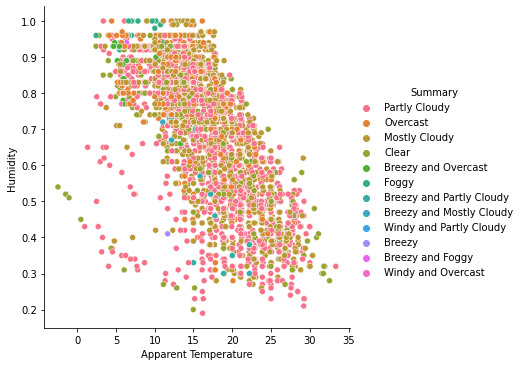

In [18]:
plt.figure(figsize=(16,6))
sns.relplot( x ='Apparent Temperature',y='Humidity',color='purple',hue="Summary" , data=df_may )

In [ ]:
#Conclusion :
#Global warming is no doubt deteriorating the climate and is affecting various parameters of the environment. Hence from this analysis, we infer that there is either a sharp rise in temperatures or sharp falls over the 10 yrs. Hence we can conclude that Global Warming has caused a major difference and unreliability in temperature predictability also taking humidity into consideration we can say that it has almost remained the same throughout the past years.